# **Data Cleaning Exercise**

In [1]:
#All our necesary libraries and the data
import pandas as pd
import numpy as np

#read in the data
nfl_data = pd.read_csv("../input/nflplaybyplay2009to2016/NFL Play by Play 2009-2017 (v4).csv")

#set seed for reproducibility
np.random.seed(0) 

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Lets check the head of the data
# We can already see a few data points missing
nfl_data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [3]:
#Check the info on the data
nfl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407688 entries, 0 to 407687
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 317.3+ MB


In [4]:
#How much data is missing
missing_vals = nfl_data.isnull().sum()

#Take a look at the first 15 columns
missing_vals[0:15]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
yrdln             840
yrdline100        840
ydstogo             0
ydsnet              0
GoalToGo          840
dtype: int64

In [5]:
#What is the percentage missing cells

total_cells = np.product(nfl_data.shape)
total_missing = missing_vals.sum()

percent_missing = (total_missing/total_cells)*100
print ('{}%'.format(percent_missing))

24.87214126835169%


**That implies about a quarter of the data is missing. That is a lot**

In [6]:
#Several ways to go about handling our missing values
#One of the less recommended approaches but an easy quick approach nonetheless is removing all the unavailable data
#Take note to remove data accross columns not the rows
dropped_data = nfl_data.dropna(axis=1)
dropped_data.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009


In [7]:
#Lets confirm if really all na_values were dropped
dropped_data.isnull().sum()

Date                           0
GameID                         0
Drive                          0
qtr                            0
TimeUnder                      0
ydstogo                        0
ydsnet                         0
PlayAttempted                  0
Yards.Gained                   0
sp                             0
Touchdown                      0
Safety                         0
Onsidekick                     0
PlayType                       0
Passer_ID                      0
PassAttempt                    0
AirYards                       0
YardsAfterCatch                0
QBHit                          0
InterceptionThrown             0
Rusher_ID                      0
RushAttempt                    0
Receiver_ID                    0
Reception                      0
Fumble                         0
Sack                           0
Challenge.Replay               0
Accepted.Penalty               0
Penalty.Yards                  0
HomeTeam                       0
AwayTeam  

In [8]:
#Checking the data, we can see although all na_values were dropped successfully, 61 columns were lost in the process
print('Columns of original data: %d \n' % nfl_data.shape[1])
print('Columns with dropped data: %d \n' % dropped_data.shape[1])
print('Amount of lost data: %d' % (nfl_data.shape[1] - dropped_data.shape[1]))

Columns of original data: 102 

Columns with dropped data: 41 

Amount of lost data: 61


**Let's try to break down our data into a smaller subset for better usability**

In [9]:
#Get a small subset of the NFL dataset
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [10]:
#Let's attempt filling all the missing values with 0
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


In [11]:
#Another method will be to fill all na_values with values that comes directly after it in the same column
#Fill any remaining na_value with 0
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


# **Let's attempt another dataset**

In [12]:
#read in the data and check the head
frisco_permits = pd.read_csv('../input/building-permit-applications-data/Building_Permits.csv')
frisco_permits.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [13]:
frisco_permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

In [14]:
#set seed for reproducibility
np.random.seed(0)

In [15]:
#Amount of missing values
missing_values = frisco_permits.isnull().sum()
missing_values

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [16]:
#Percentage missing values
total_cells = np.product(frisco_permits.shape)
total_missing_values = missing_values.sum()

percent_missing = (total_missing_values/total_cells)*100
print('The percentage of missing values is %.2f'%percent_missing+ '%')

The percentage of missing values is 26.26%


**26.26% is more than a quarter of our data missing**

In [17]:
frisco_permits[['Street Number Suffix','Zipcode']].isnull().sum()

Street Number Suffix    196684
Zipcode                   1716
dtype: int64

In [18]:
#Lets try a rows missing values removal
frisco_na_rows_dropped = frisco_permits.dropna(axis=0)
frisco_na_rows_dropped

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


**All the rows in our dataset have na_values hence the dropping of all the data**

In [19]:
#Lets try a columns missing values removal
frisco_na_cols_dropped = frisco_permits.dropna(axis=1)
frisco_na_cols_dropped

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,Montgomery,issued,12/05/2017,12/05/2017,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,Bush,issued,12/06/2017,12/05/2017,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,Indiana,issued,12/06/2017,12/06/2017,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,Sutter,issued,12/06/2017,12/06/2017,1489608233656


In [20]:
frisco_na_cols_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Permit Number           198900 non-null  object
 1   Permit Type             198900 non-null  int64 
 2   Permit Type Definition  198900 non-null  object
 3   Permit Creation Date    198900 non-null  object
 4   Block                   198900 non-null  object
 5   Lot                     198900 non-null  object
 6   Street Number           198900 non-null  int64 
 7   Street Name             198900 non-null  object
 8   Current Status          198900 non-null  object
 9   Current Status Date     198900 non-null  object
 10  Filed Date              198900 non-null  object
 11  Record ID               198900 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.2+ MB


In [21]:
print('We lost {} columns'.format(frisco_permits.shape[1] - frisco_na_cols_dropped.shape[1]))

We lost 31 columns


In [22]:
#Using bfill to fill in NaN values
frisco_permits_with_na_imputed = frisco_permits.fillna(method='bfill', axis=0).fillna(0)
frisco_permits_with_na_imputed

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,A,Ellis,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,A,Geary,St,...,3.0,constr type 3,1.0,constr type 1,Y,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,A,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,Y,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,A,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),Y,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,A,Market,St,...,3.0,constr type 3,1.0,constr type 1,Y,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,0,Montgomery,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,0,Bush,St,...,5.0,wood frame (5),5.0,wood frame (5),0,0.0,0,0.0,0,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,0,Indiana,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,0,Sutter,St,...,0.0,0,0.0,0,0,0.0,0,0.0,0,1489608233656


In [23]:
frisco_permits_with_na_imputed.isnull().sum()

Permit Number                             0
Permit Type                               0
Permit Type Definition                    0
Permit Creation Date                      0
Block                                     0
Lot                                       0
Street Number                             0
Street Number Suffix                      0
Street Name                               0
Street Suffix                             0
Unit                                      0
Unit Suffix                               0
Description                               0
Current Status                            0
Current Status Date                       0
Filed Date                                0
Issued Date                               0
Completed Date                            0
First Construction Document Date          0
Structural Notification                   0
Number of Existing Stories                0
Number of Proposed Stories                0
Voluntary Soft-Story Retrofit   

# **SCALING AND NORMALIZATION** 

**Scaling in Data analysis refers to changing numeric values to fit in a range of 0 - 1**

In [24]:
#Let's import our scaling tool and a few visualization libraries
from mlxtend.preprocessing import minmax_scaling 

import seaborn as sns
import matplotlib.pyplot as plt

#Set seed for reproducibility
np.random.seed(0)

In [25]:
#Lets generate data we can scale and normalize so we see it in practice
original_data = np.random.exponential(size=1000)
original_data[0:10]

array([0.79587451, 1.25593076, 0.92322315, 0.78720115, 0.55104849,
       1.03815929, 0.5755192 , 2.22352441, 3.31491218, 0.4836021 ])

In [26]:
#Minmax Scaling the original data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])
scaled_data[0:10]

array([[0.09290694],
       [0.14664878],
       [0.10778327],
       [0.09189375],
       [0.06430738],
       [0.12120963],
       [0.06716595],
       [0.25967902],
       [0.38717038],
       [0.05642858]])

Text(0.5, 1.0, 'Scaled Data')

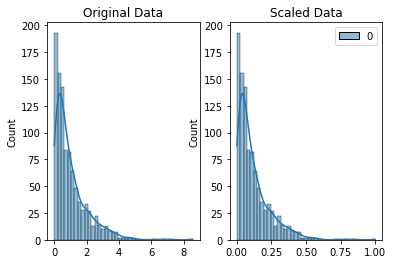

In [27]:
#Lets do a visualization for comparison
fig, ax = plt.subplots(1,2)
sns.histplot(original_data, ax=ax[0], kde=True, alpha=0.5)
ax[0].set_title('Original Data')
sns.histplot(scaled_data, ax=ax[1], kde=True, alpha=0.5)
ax[1].set_title('Scaled Data')

**Normalization is the transformation of a data range into a normal distribution**

In [28]:
#Lets import the Box-Cox Normalization tool
from scipy import stats

#Normalize the original data
normalized_data = stats.boxcox(original_data)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Normalized Data')

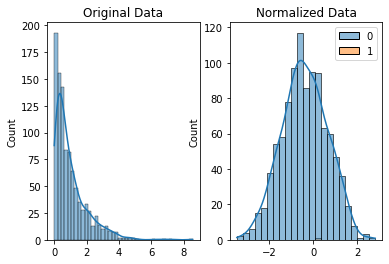

In [29]:
#Lets do a comparison via visualization 
fig, ax = plt.subplots(1,2)
sns.histplot(original_data, ax=ax[0], kde=True, alpha=0.5)
ax[0].set_title('Original Data')
sns.histplot(normalized_data, ax=ax[1], kde=True, alpha=0.5)
ax[1].set_title('Normalized Data')

**Let us attempt the same processes with another dataset**

In [30]:
#Firstly, we'll import all the tools and libraries we need
import numpy as np
import pandas as pd

from mlxtend.preprocessing import minmax_scaling
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

#Read in the data
kickstarters_2017 = pd.read_csv('../input/kickstarter-projects/ks-projects-201801.csv')

#Set seed for reproducibility
np.random.seed(0)

In [31]:
#Lets check out the information and head on our dataframe
kickstarters_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [32]:
kickstarters_2017.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


**We will be working with the goals of each campaign(usd_goal_real). We will scale and view plots to see differences between and after scaling**

In [33]:
#Get the original data
original_data = pd.DataFrame(kickstarters_2017['usd_goal_real'])

#Scale the original data
scaled_data = minmax_scaling(original_data, columns=['usd_goal_real'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled Data')

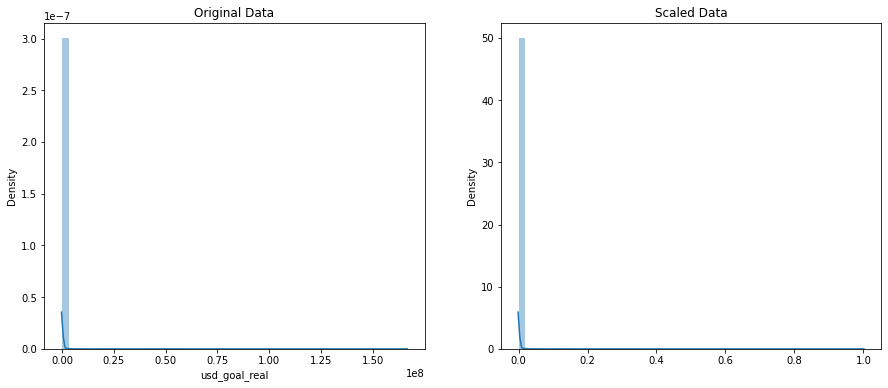

In [34]:
#Plot the original and scaled data for comparison
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.distplot(kickstarters_2017.usd_goal_real, ax=ax[0], kde=True)
ax[0].set_title('Original Data')
sns.distplot(scaled_data, ax=ax[1], kde=True)
ax[1].set_title('Scaled Data')

In [48]:
#Lets do a print of the original data vs scaled data
print('Original Data\nPreview:\n', original_data.head())
print('Minimum value: ', float(original_data.min()),'\nMaximum value: ', float(original_data.max()))
print('='*30)
print('Scaled Data\nPreview:\n', scaled_data.head())
print('Minimum value:', float(scaled_data.min()),'\nMaximum value:', float(scaled_data.max()))

Original Data
Preview:
    usd_goal_real
0        1533.95
1       30000.00
2       45000.00
3        5000.00
4       19500.00
Minimum value:  0.01 
Maximum value:  166361390.71
Scaled Data
Preview:
    usd_goal_real
0       0.000009
1       0.000180
2       0.000270
3       0.000030
4       0.000117
Minimum value: 0.0 
Maximum value: 1.0


> **Now, let us scale and normalize the goal and usd_pledged columns resp.**

In [50]:
#Select the goal column and transform to a dataframe
original_goal_data = pd.DataFrame(kickstarters_2017.goal)

#Scale the data 
scaled_goal_data = minmax_scaling(original_goal_data, columns=['goal'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled Goal Data')

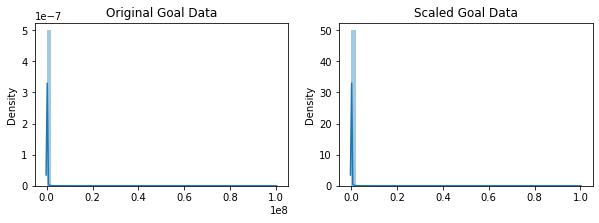

In [53]:
#Let us visualize
fig, ax = plt.subplots(1,2,figsize=(10,3))
sns.distplot(original_goal_data, ax=ax[0])
ax[0].set_title('Original Goal Data')
sns.distplot(scaled_goal_data, ax=ax[1])
ax[1].set_title('Scaled Goal Data')

In [68]:
#Now, let us normalize the usd_pledged column
pledges = (kickstarters_2017.usd_pledged_real)
#normalized_pledges = stats.boxcox(pledges)

#NOTE: Box-Cox only accepts +ve data
#Lets get all the positive pledges, we'll do this by getting their indexes and that to get the values
index_pos_pledge = kickstarters_2017.usd_pledged_real > 0
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_pos_pledge]

# Normalizing the positive pledges with Box-Cox
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0],
                              name='usd_pledged_real',
                              index=positive_pledges.index)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized Data')

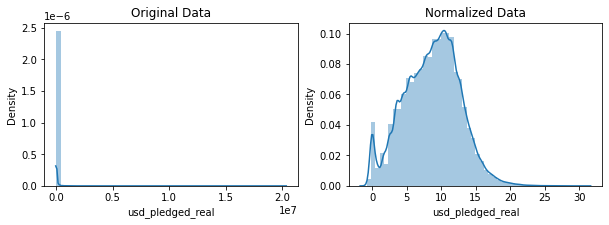

In [69]:
#Visualize the original and normalized data
fig, ax = plt.subplots(1,2,figsize=(10,3))
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title('Normalized Data')

In [72]:
print('Original data\nPreview:\n', positive_pledges.head())
print('Minimum value:', float(positive_pledges.min()),
      '\nMaximum value:', float(positive_pledges.max()))
print('='*30)

print('Normalized data\nPreview:\n', normalized_pledges.head())
print('Minimum value:', float(normalized_pledges.min()),
      '\nMaximum value:', float(normalized_pledges.max()))

Original data
Preview:
 1     2421.0
2      220.0
3        1.0
4     1283.0
5    52375.0
Name: usd_pledged_real, dtype: float64
Minimum value: 0.45 
Maximum value: 20338986.27
Normalized data
Preview:
 1    10.165142
2     6.468598
3     0.000000
4     9.129277
5    15.836853
Name: usd_pledged_real, dtype: float64
Minimum value: -0.7779954122762203 
Maximum value: 30.69054020451361
